In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# 取得資料集
df = sns.load_dataset('titanic')

In [2]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


<AxesSubplot:xlabel='sex', ylabel='survived'>

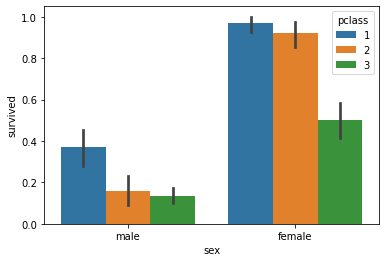

In [6]:
# 將每個班級中男性和女性的平均存活率用長形圖可視化
sns.barplot(x = df.sex, y = df.survived,hue = df.pclass)

C:\Users\User\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


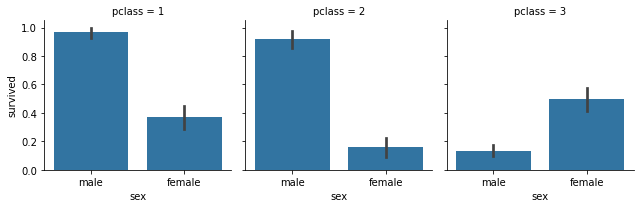

In [19]:
g = sns.FacetGrid(df,col = 'pclass')
g.map(sns.barplot,'sex','survived')

<AxesSubplot:xlabel='pclass,sex'>

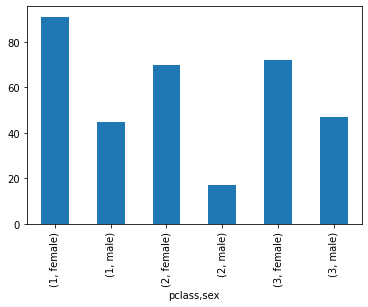

In [31]:
# 先檢視各艙位存活人數，此時可以使用groupby函數進行分類，
# 其中 survived＝1表示存活，survived＝0表示死亡，將survived加總即為各艙等生存人數。

df.groupby('pclass').survived.sum()

#加上性別
survived=df.groupby(['pclass','sex']).survived.sum()
survived
survived.plot(kind='bar')

<AxesSubplot:xlabel='pclass,sex'>

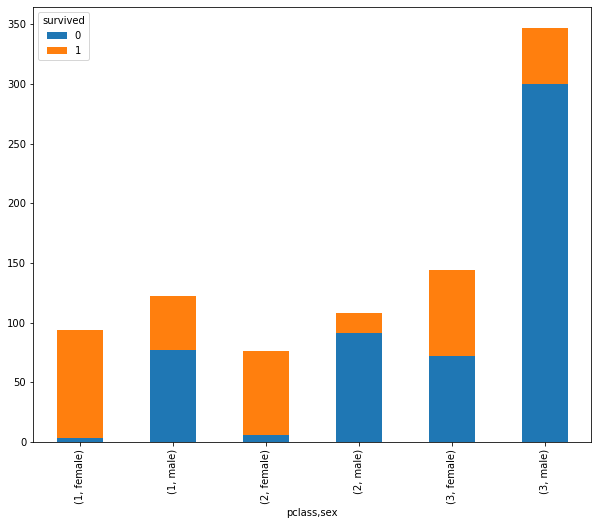

In [38]:
# 使用pd.crosstab函數繪製交叉表，交叉表可以很直觀的依據艙位等級及性別來查看存活人數及死亡人數。
# 繪製堆疊條形圖，x軸代表依據艙等分成男性及女性，y軸代表人數，其中藍色代表死亡人數，橘色代表存活人數。
survived_counts = pd.crosstab([df.pclass, df.sex],df.survived)
survived_counts
survived_counts.plot(kind="bar",stacked=True,figsize=(10,8))


C:\Users\User\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


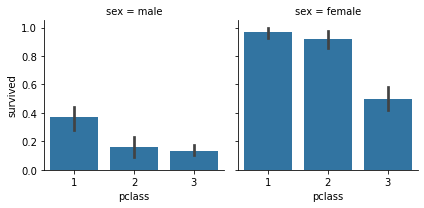

In [41]:
# 瞭解不同性別在各艙等的存活率
h = sns.FacetGrid(df,col = 'sex')
h.map(sns.barplot,'pclass','survived')